## Marketing Analytics: Customer Segmentation.

### Data
##### The data contains 2,205 observations and 39 columns. The dataset description on the card does 
##### not match the actual columns in the dataset. The below list contains actual columns from the 
##### dataset and the assumed descriptions from the column's names.

![DICTIONARY](dictionary.png) 


### Key Concepts and Challenges:
##### 1.Data Collection: Obtain a dataset containing customer information, purchase history, and relevant data.
##### 2. Data Exploration and Cleaning: Explore the dataset, understand its structure, and handle any missing or inconsistent data.

##### 3.Descriptive Statistics: Calculate key metrics such as average purchase value, frequency of purchases, etc.
##### 4.Customer Segmentation: Utilize clustering algorithms (e.g., K-means) to segment customers based on behavior and purchase patterns.
##### 5.Visualization: Create visualizations (e.g., scatter plots, bar charts) to illustrate customer segments.
##### 6.Insights and Recommendations: Analyze characteristics of each segment and provide insights.


### Data Preparation and Cleaning
##### In this section: 
##### Reviewing data columns and comparing them to the dataset description
##### Looking for missing values
##### Checking column types
##### Assessing unique values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
df = pd.read_csv('ifood_df.csv')

#### Analysing the dataset contents

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [3]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [4]:
df.shape

(2205, 39)

In [5]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [6]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


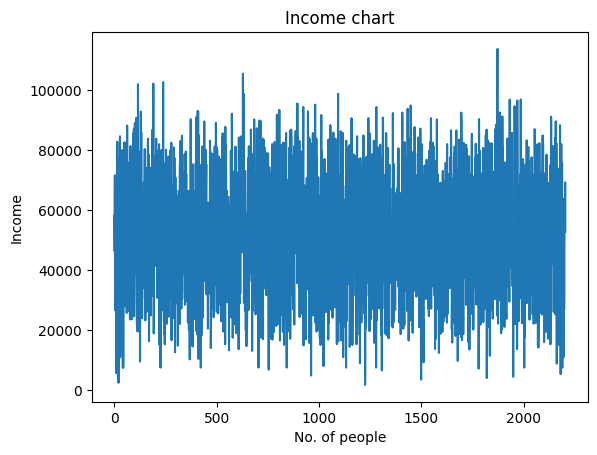

In [7]:
plt.plot(df['Income'])
plt.xlabel('No. of people')
plt.ylabel('Income')
plt.title('Income chart')
plt.show()

In [8]:
df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [9]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'],inplace=True)

### Data Exploration
##### In this section:

##### Box plot for the total amount spent on all products (MntTotal)
##### Outliers
##### Box plot and histogram for income
##### Histogram for age
##### Correlation matrix
##### Point-Biserial correlations for binary variables

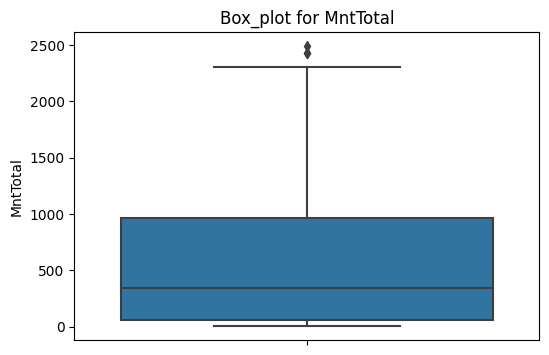

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, y='MntTotal')
plt.ylabel('MntTotal')
plt.title('Box_plot for MntTotal')
plt.show()

In [11]:
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['MntTotal'] < lower_bound) | (df['MntTotal'] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [12]:
data = df[(df['MntTotal']>lower_bound) & (df['MntTotal']<upper_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


In [13]:
data.shape

(2202, 37)

### Boxplot and histogram for income

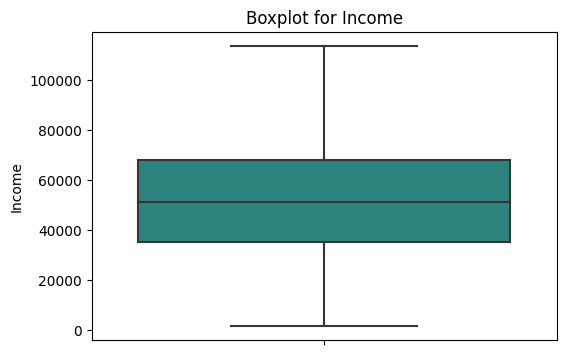

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, y='Income', palette='viridis')
plt.title('Boxplot for Income')
plt.ylabel('Income')
plt.show()

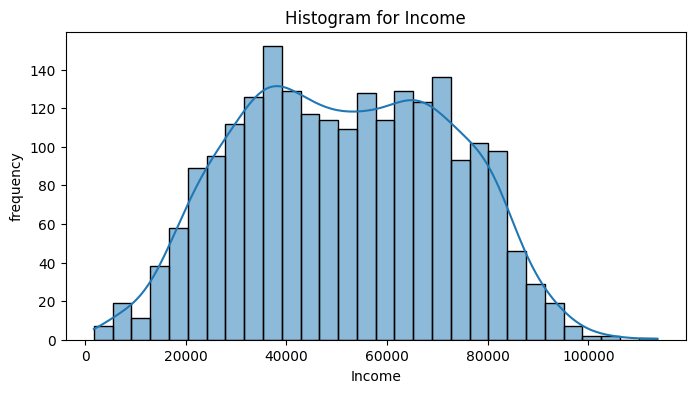

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Income',bins=30,  kde=True)
plt.xlabel('Income')
plt.title('Histogram for Income')
plt.ylabel('frequency')
plt.show()

In [16]:
print("Skewness: %f" % data['Age'].skew())
print("Kurtosis: %f" % data['Age'].kurt())

Skewness: 0.091227
Kurtosis: -0.796125


##### The age distribution looks approximately symmetrical and the left and 
##### right sides of distribution are roughly equal.
##### Skewness of 0.09 (close to zero) supports the visual observation of 
##### the distribution. Kurtosis of -0.8 suggests that the distribution is close to 
##### normal with lighter tails and less peaked than a normal distribution.

### Correlation_matrix

##### As the data contain so many columns therfore showing all of them with 
##### the help of corr will be not so usefull.We will merge some cols and 
##### visualise their MntTotal with some of the cols data

In [17]:
cols_demographics = ['Income','Age']
cols_children = ['Teenhome','Kidhome']
cols_marital = [ 'marital_Divorced', 'marital_Married', 'marital_Single',
                 'marital_Together', 'marital_Widow']
cols_mnt = ['MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds','MntTotal', 'MntRegularProds']
cols_education = ['education_2n Cycle','education_Basic', 'education_Graduation', 'education_Master',
               'education_PhD']
cols_campaign=['AcceptedCmpOverall','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_communicate = ['Complain', 'Response', 'Customer_Days']


In [18]:
len(cols_campaign+cols_children+cols_communicate+cols_demographics+cols_education+cols_marital+cols_mnt+cols_source_of_purchase)

36

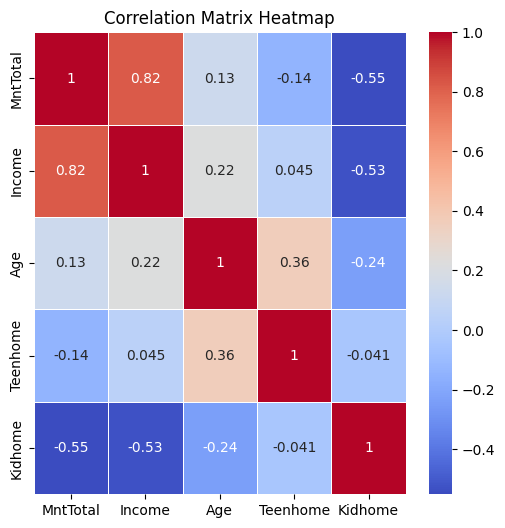

In [19]:
corr_matrix = data[['MntTotal']+cols_demographics+cols_children].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Feature Engineering

##### New feature: Marital
##### New feature: In_relationship

### New feature: Marital

##### We are going to create a new col for the marital 
##### for the Divorced, Single, Married, Together, Widow 
##### and create a plot for them

In [20]:
def marital_status(row):
    if row['marital_Divorced']==1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] ==1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'

data['Marital'] = data.apply(marital_status, axis=1)
        

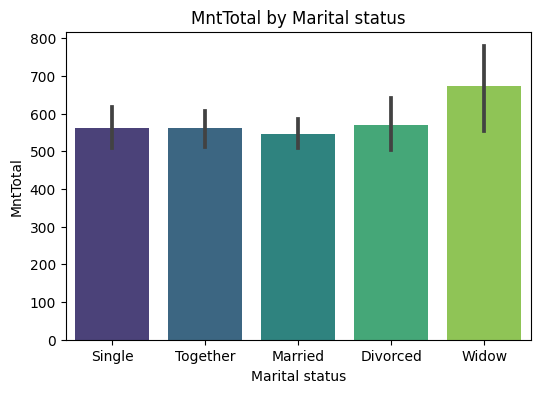

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(data=data,x = 'Marital', y='MntTotal',  palette='viridis')
plt.ylabel('MntTotal')
plt.xlabel('Marital status')
plt.title('MntTotal by Marital status')
plt.show()

## New feature: In_relationship
##### There are 3 features that reflect if a person is single (Single, Divorced, Widow) and 2 features if a 
##### person is in relationship (Together, Married). We will add an additional feature 'In_relationship'. This 
##### feature will equal 1 if a customer's marital status is 'Married' or 'Together' and 0 in all other cases.

In [22]:
def in_relationship(row):
    if  row['marital_Married'] == 1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0

data['In_relationship'] = data.apply(in_relationship, axis=1)
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,Single,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,Together,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,Together,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,Married,1


## K-Means Clustering¶
##### K-means clustering is an unsupervised machine learning algorithm used to cluster data based on similarity. 
##### K-means clustering usually works well in practice and scales well to the large datasets.

##### In this section:

##### .Standardising data
##### .Principal Component Analysis (PCA)
##### .Elbow method
##### .Silhouette score analysis

## Standardising data
##### K-means clustering algorithm is based on the calculation of distances between data points to form clusters. 
##### When features have different scales, features with larger scales can disproportionately influence the distance 
##### calculation. There are various ways to standardise features, we will use standard scaling .

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_cluster = ['Income', 'MntTotal', 'In_relationship']
data_scaled = data.copy()
data_scaled[cols_for_cluster] = scaler.fit_transform(data[cols_for_cluster])
data_scaled[cols_for_cluster].describe()

,Income,MntTotal,In_relationship
count,2.202000e+03,2.202000e+03,2.202000e+03
mean,2.742785e-17,-8.873717e-17,-4.678869e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.410685e+00,-9.724232e-01,-1.348874e+00
25%,-7.926475e-01,-8.815089e-01,-1.348874e+00
50%,-1.508040e-02,-3.806058e-01,7.413589e-01
75%,8.017617e-01,7.024988e-01,7.413589e-01
max,3.006747e+00,3.048788e+00,7.413589e-01


## Principal Component Analysis (PCA)
##### PCA is a technique of dimensionality reduction. PCA takes the original features (dimensions)
##### and create new features that capture the most variance of the data

In [24]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_cluster])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

## Elbow method
##### The elbow method is a technique used to determine the optimal 
##### number of clusters (K) for K-means clustering algorithm.

In [25]:
X = data_scaled[cols_for_cluster]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

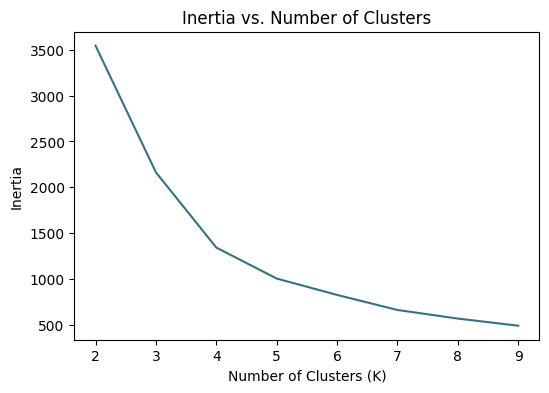

In [26]:
plt.figure(figsize=(6,4))
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

## Silhouette score
##### Silhouette score analysis is a technique used to evaluate the quality of clusters created by clustering 
##### algorithms like K-means, hierarchical clustering, or DBSCAN.
##### In general, a higher silhouette score indicates better clustering, with scores 
##### closer to 1 suggesting dense, well-separated clusters.

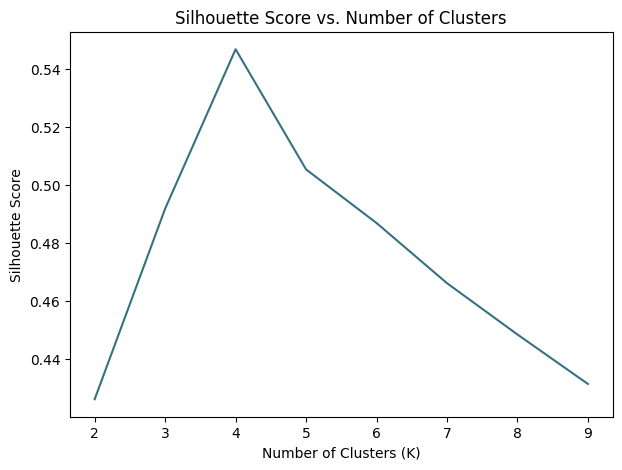

In [27]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

##### Here the cluster 4 has highest silhouette score therefore it's the best score for number of cluster.

In [30]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(data_scaled[cols_for_cluster])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_cluster])

In [31]:
inertia_list

[3543.709662465084,
 2163.19199166951,
 1342.8151210510664,
 1005.1843170577222,
 826.6148427514615,
 662.5681638106366,
 568.8257901782082,
 490.89200917348614]

In [32]:
silhouette_list

[0.4261496327603302,
 0.4917937631647986,
 0.5467283698789616,
 0.5053261591473884,
 0.48686229551314836,
 0.46613445422437716,
 0.4484622937598547,
 0.4314212290541942]

##  In this section.
##### Visualisation of clusters
##### Mean consumption of different product types by cluster
##### Cluster sizes
##### Income by cluster
##### In_relationship feature by cluste

### Visualisation of clusters

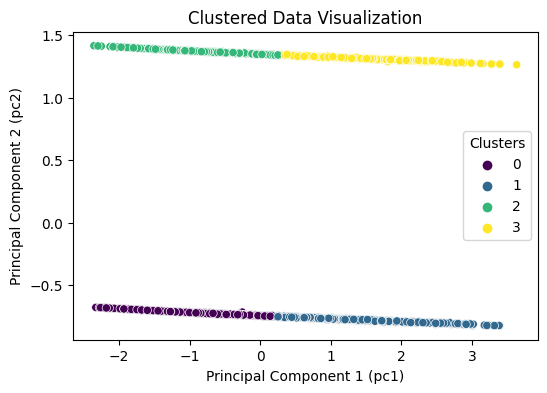

In [34]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

In [35]:
data['Cluster'] = data_scaled.Cluster
data.groupby('Cluster')[cols_for_cluster].mean()

,Income,MntTotal,In_relationship
Cluster,,,
0,37892.819883,158.463158,1.0
1,71818.929329,1147.372792,1.0
2,37332.339956,150.761589,0.0
3,71946.155488,1159.612805,0.0


### Mean consumption of different product types by cluster


In [36]:
mnt_data = data.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt_data.head()

,Cluster,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,MntRegularProds
0,0,92.046784,7.640936,39.438596,11.423392,7.913450,24.500585,158.463158,133.962573
1,1,623.261484,52.489399,341.326855,75.577739,54.717314,71.093640,1147.372792,1076.279152
2,2,85.450331,7.832230,38.774834,10.971302,7.732892,25.099338,150.761589,125.662252
3,3,613.862805,54.929878,357.902439,77.603659,55.314024,74.280488,1159.612805,1085.332317


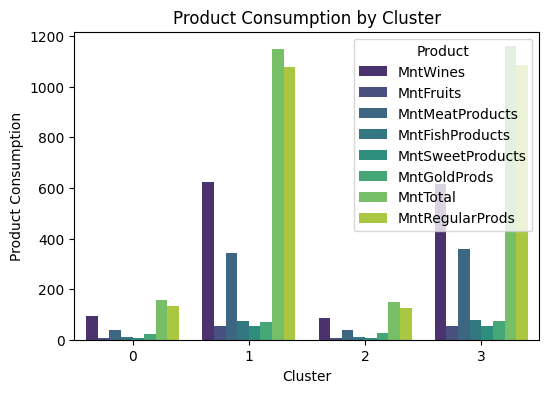

In [39]:
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(6, 4))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper right")

plt.show()

### Cluster sizes

Text(0, 0.5, 'MntTotal')

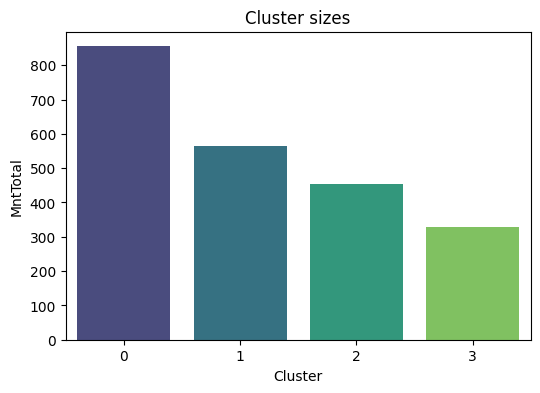

In [42]:
cluster_sizes = data.groupby('Cluster')[['MntTotal']].count().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='Cluster', y='MntTotal', data=cluster_sizes, palette = 'viridis')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')

In [43]:
total_rows = len(data)
cluster_sizes['Share%'] = round(cluster_sizes['MntTotal'] / total_rows*100,0)
cluster_sizes.head()

,Cluster,MntTotal,Share%
0,0,855,39.0
1,1,566,26.0
2,2,453,21.0
3,3,328,15.0


### Income by cluster
###### Boxplot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


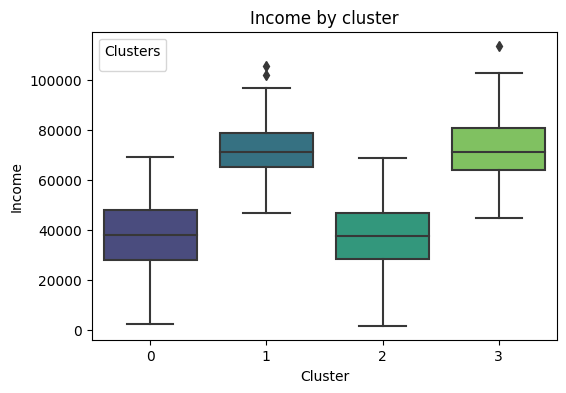

In [45]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Cluster', y='Income', data=data, palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='Clusters')

### Scatter plot

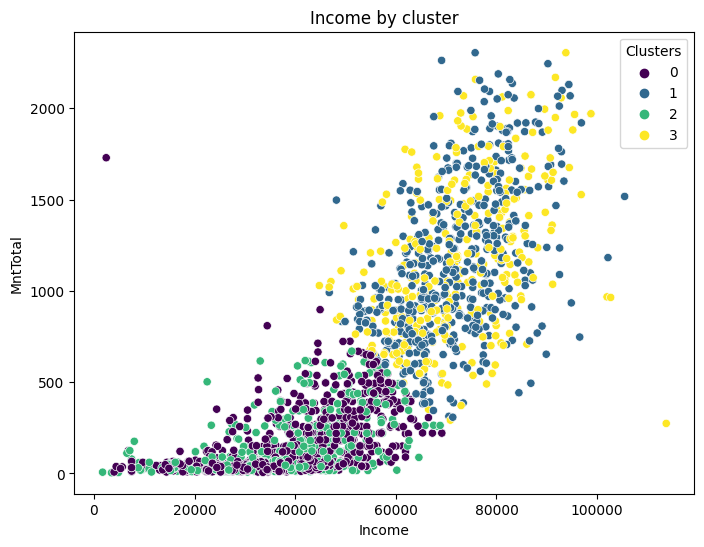

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=data, hue = 'Cluster', palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')

### In_relationship feature

Text(0, 0.5, 'In_relationship')

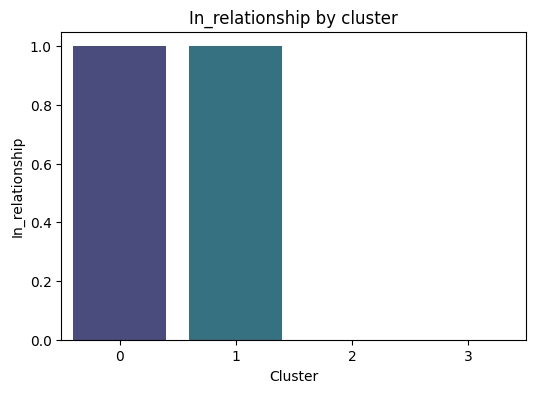

In [48]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Cluster', y='In_relationship', data=data, palette='viridis')
plt.title('In_relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('In_relationship')

## Results
##### This section contains the results of the K-means clustering analysis, which aimed to identify distinct 
##### customer segments based on the total amount of purchases they made (MntTotal). The analysis utilised 'Income' 
##### and 'In_relationship' features.

#### Optimal number of clusters = 4
##### The Elbow Method and Silhouette Analysis suggested 4 clusters (k=4). The elbow method highlighted
##### the number of 4 or 5 clusters as a reasonable number of clusters. The silhouette score analysis 
##### revealed a peak silhouette score for k=4.

### Cluster Characteristics
#### Cluster 0: Low value customers in relationship
##### This cluster represents 39% of the customer base
##### These customers have low income and they are in a relationship
#### Cluster 1: High value customers in relationship (either married or together)
##### This cluster represents 26% of the customer base
##### These customers have high income and they are in a relationship
#### Cluster 2: Low value single customers
##### This cluster represents 21% of the customer base
##### These customers have low income and they are single
#### Cluster 3: High value single customers
##### This cluster represents 15% of the customer base
##### These customers have high income and they are single


In [49]:
cluster_sizes.head()

,Cluster,MntTotal,Share%
0,0,855,39.0
1,1,566,26.0
2,2,453,21.0
3,3,328,15.0


## Recommendations
### Cluster 0: Low value customers in relationship
##### This cluster has the highest percentage of our customers (39%).
##### Family offers and discounts may influence these customers to make more purchases
### Cluster 1: High value customers in relationship (either married or together)
##### Preliminary analysis showed that high income customers buy more wines and fruits.
##### A tailored campaign to promote high quality wines may bring good results.
##### This cluster contains customers in relationship, family-oriented promo-images should be quite effective for this audience.
### Cluster 2: Low value single customers
##### Promos with discounts and coupons may bring good results for this targeted group.
##### Loyalty program may stimulate these customers to purchase more often.
### Cluster 3: High value single customers
##### Similar to the Cluster 0, these customers buy a lot of wines and fruits.
##### This cluster contains single customers. Promo images with friends, parties or single trips may be more efficient for single customers